In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from experiment_random import *
from tqdm import tqdm

/home/sergei/miniconda3/envs/ML/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Creating network for 1-dimensional input and 5-dimensional output, with 1 hidden layers


100%|██████████| 6/6 [00:02<00:00,  2.93it/s]


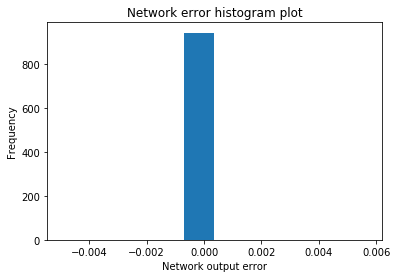

Error; maximal over inputs, average over dropout:
True values array mean: 0.497059 variance 0.004829
Experiment 0.000007 Std 0.000157
Equation   0.000035 Std 0.002054
Tightness  19.5% Std 7.6%


(6.77411e-06,
 0.0001565576,
 3.467187382851004e-05,
 0.0020541368292370248,
 0.004828995)

In [2]:
np.random.seed(42)
RandomExperiment(N = [1, 10, 5], P = 0.0001, KLips = 0.01, do_print = True).run(inputs = 6, repetitions = 10000, do_print = True, do_plot = True, do_tqdm = True)

In [3]:
Ls = range(2, 11)
results = [RandomExperiment(P = 0.01, N = [10] * L + [1], KLips = 0.01).run(inputs = 5, do_tqdm = False, do_plot = False, do_print = False) for L in tqdm(Ls)]

100%|██████████| 9/9 [00:44<00:00,  4.97s/it]


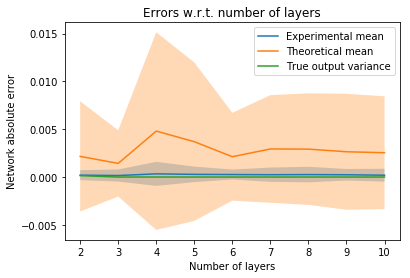

In [4]:
mean_exp, std_exp, mean_bound, std_bound, std_true = [np.array(x) for x in zip(*results)]
plt.figure()
plt.title('Errors w.r.t. number of layers')
plt.xlabel('Number of layers')
plt.ylabel('Network absolute error')
#mean_exp *= 10
#std_exp *= 10
plt.plot(Ls, mean_exp, label = 'Experimental mean')
plt.fill_between(Ls, mean_exp - std_exp, mean_exp + std_exp, alpha = 0.3)
plt.plot(Ls, mean_bound, label = 'Theoretical mean')
plt.fill_between(Ls, mean_bound - std_bound, mean_bound + std_bound, alpha = 0.3)
plt.plot(Ls, std_true, label = 'True output variance')
plt.legend()
plt.show()

Mean error 0.03659, 10.49% from theoretical, norm 0.81
Mean error 0.03823, 10.96% from theoretical, norm 0.92
Mean error 0.04017, 11.52% from theoretical, norm 1.04
Mean error 0.04160, 11.93% from theoretical, norm 1.21
Mean error 0.04362, 12.51% from theoretical, norm 1.37
Mean error 0.04431, 12.71% from theoretical, norm 1.50
Mean error 0.04567, 13.10% from theoretical, norm 1.61
Mean error 0.04603, 13.20% from theoretical, norm 1.73
Mean error 0.04609, 13.22% from theoretical, norm 1.73
Mean error 0.04668, 13.39% from theoretical, norm 1.85


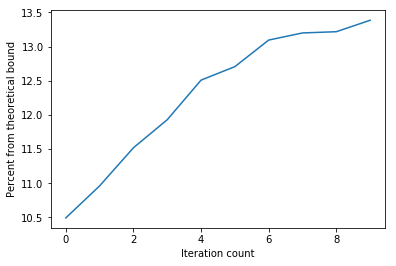

In [5]:
# Trying genetic search for x

np.random.seed(42)

# Setting parameters and creating the experiment
N = 5
L = 2
p = 0.1
K_ = 0.1
repetitions = 10000
to_add = 10
to_keep = 5
experiment = RandomExperiment([N] * L + [1], [p] * (L - 1), K_)

mean_bound, std_bound = experiment.get_mean_std_error()

# creating initial inputs
data = np.random.randn(to_keep, N)

# percents from theoretical bound
percents = []

maxiter = 10

for _ in range(maxiter):
  data_ = data

  # Randomizing inputs
  for input_ in data_:
    rand_direction = np.random.randn(to_add, N)
    rand_direction /= np.linalg.norm(rand_direction, axis = 0)
    rand_direction *= 0.5
    input_ = input_ + rand_direction
    data = np.vstack((data, input_))

  # Computing true values
  trues = [experiment.predict_no_dropout(value) for value in data]

  # Running the experiment
  errors = [experiment.get_error(value, repetitions = repetitions) for value in data]

  # List of errors for inputs
  error_array = np.mean(np.max(np.abs(errors), axis = 2), axis = 1)

  max_exp = np.max(error_array)
  
  # Choosing maximal error
  indices = np.argsort(-error_array)

  # Choosing best to_keep entries
  data = data[indices[:to_keep]]
  
  percent = 100 * max_exp / mean_bound
  print('Mean error %.5f, %.2f%% from theoretical, norm %.2f' % (max_exp, percent, np.linalg.norm(data.flatten()) / data.shape[0]))
  percents.append(percent)
  
plt.xlabel('Iteration count')
plt.ylabel('Percent from theoretical bound')
plt.plot(percents)
plt.show()